# 📈 Multiple Linear Regression Analysis on [student_habits_performance]

In [280]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn

## 1.load Dataset

In [281]:
df = pd.read_csv("/kaggle/input/student-habits-vs-academic-performance/student_habits_performance.csv")
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


## 2. Information about the Dataset

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

## 3. Treating Missing Values

In [283]:
df['parental_education_level'].nunique()

3

In [284]:
df["parental_education_level"].fillna('Missing',inplace=True)

/tmp/ipykernel_35/131622421.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["parental_education_level"].fillna('Missing',inplace=True)


In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       1000 non-null   object 
 12  internet_quality               1000 non-null   ob

## 4.Performed Exploratory Data Analysis On Different Columns

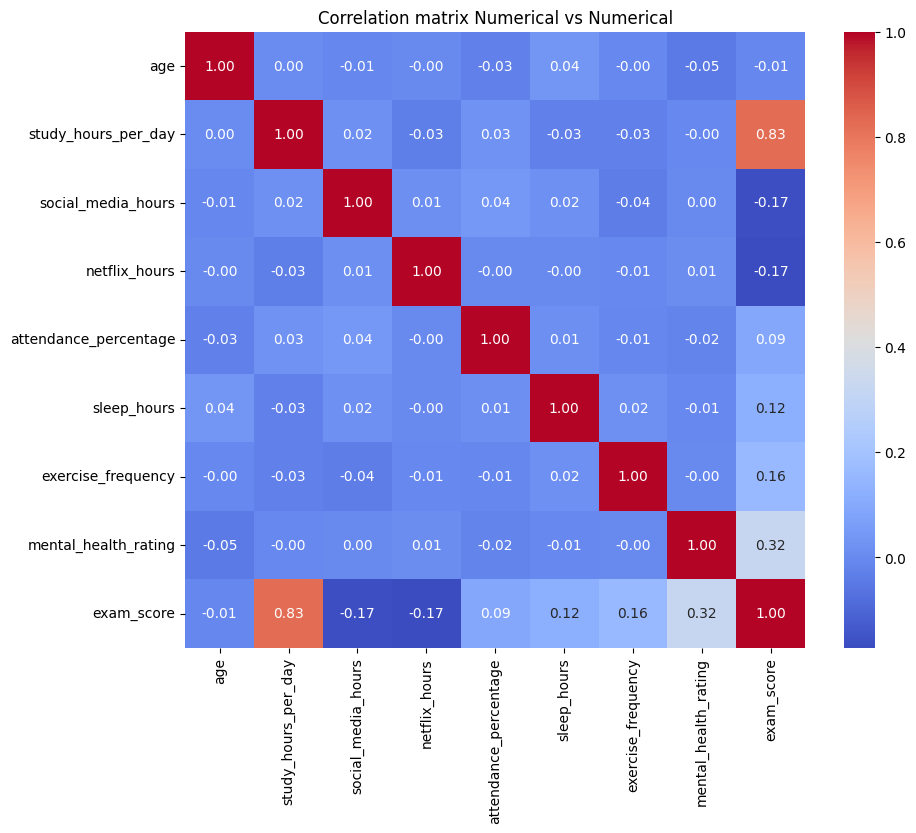

In [291]:
df_numeric = df.select_dtypes(include='number')

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation matrix Numerical vs Numerical")
plt.show()

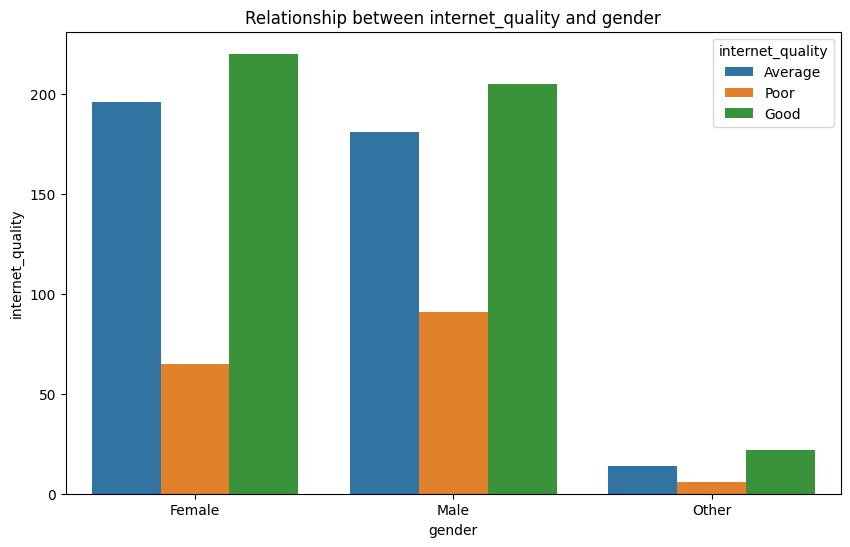

In [292]:
plt.figure(figsize=(10,6))
sns.countplot(x='gender', hue='internet_quality', data=df)

plt.title('Relationship between internet_quality and gender')
plt.xlabel('gender')
plt.ylabel('internet_quality')
plt.show()

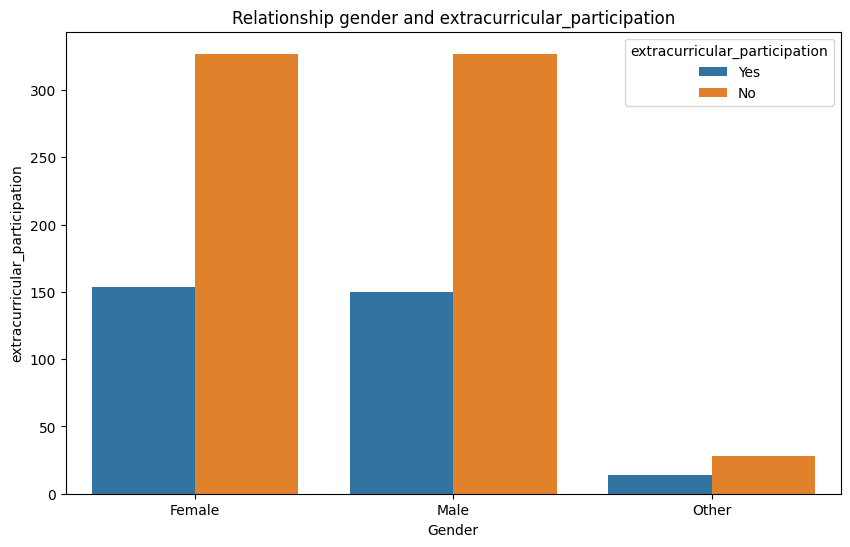

In [293]:
plt.figure(figsize=(10,6))
sns.countplot(x='gender', hue='extracurricular_participation', data=df)

plt.title('Relationship gender and extracurricular_participation')
plt.xlabel('Gender')
plt.ylabel('extracurricular_participation')
plt.show()

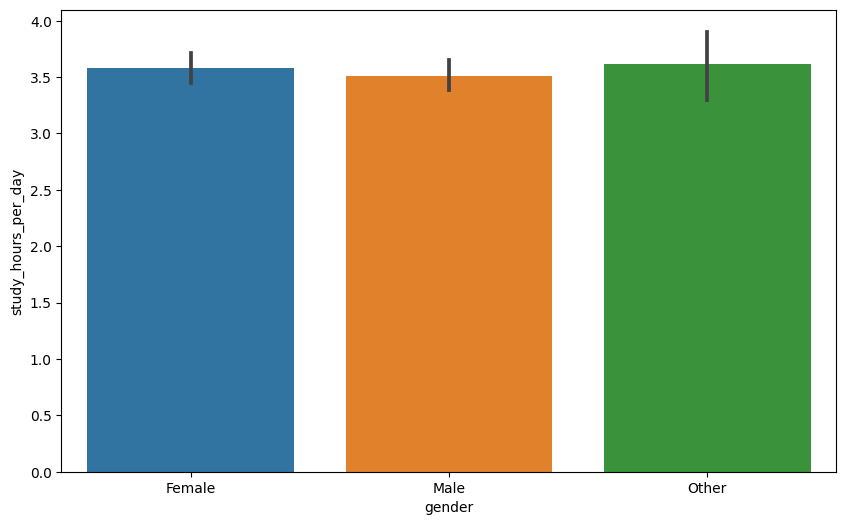

In [294]:
plt.figure(figsize=(10,6))
sns.barplot(x='gender',y='study_hours_per_day',data=df)
plt.show()


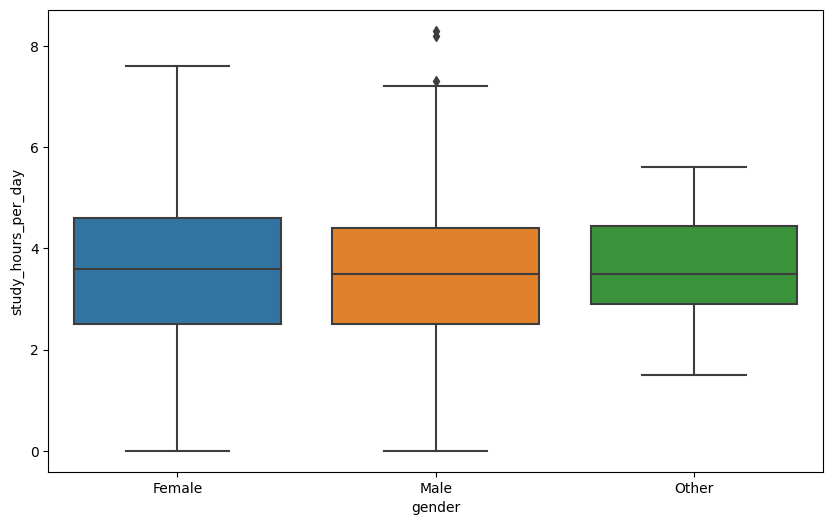

In [295]:
plt.figure(figsize=(10,6))
sns.boxplot(x='gender',y='study_hours_per_day',data=df)
plt.show()

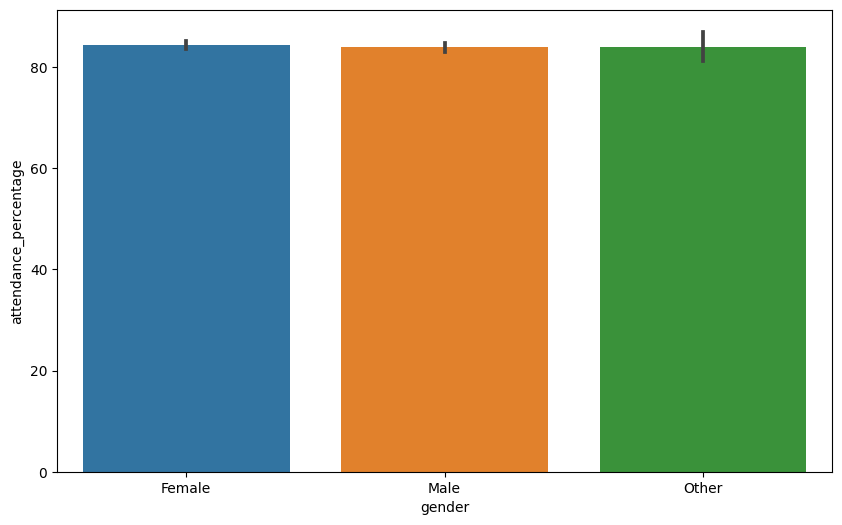

In [296]:
plt.figure(figsize=(10,6))
sns.barplot(x='gender',y='attendance_percentage',data=df)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


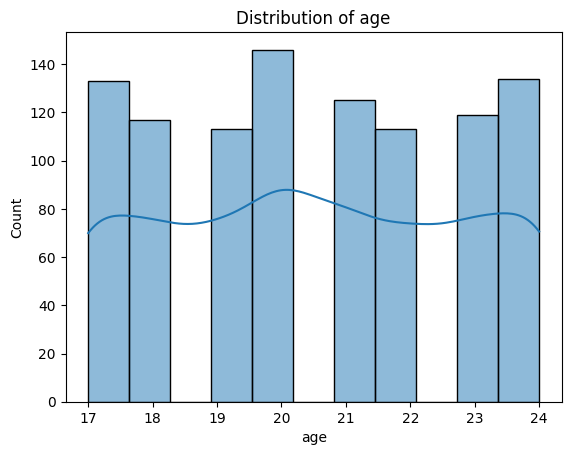

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


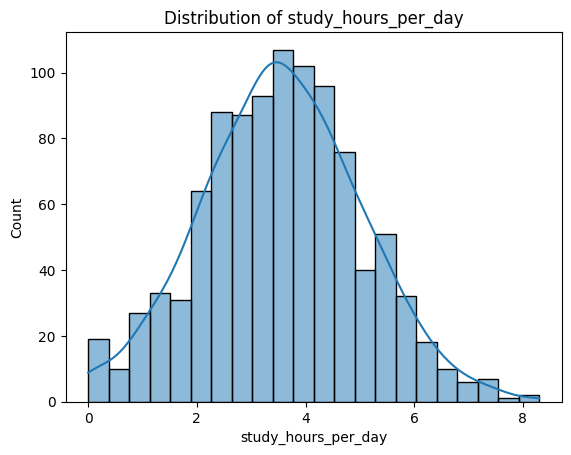

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


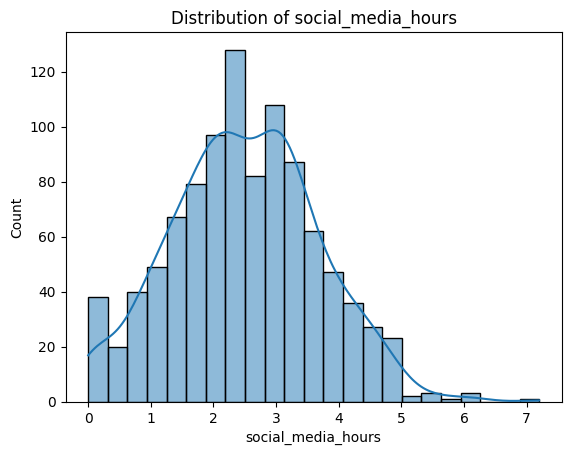

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


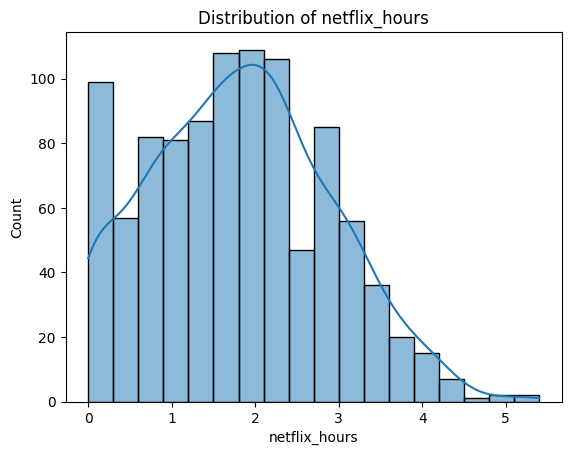

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


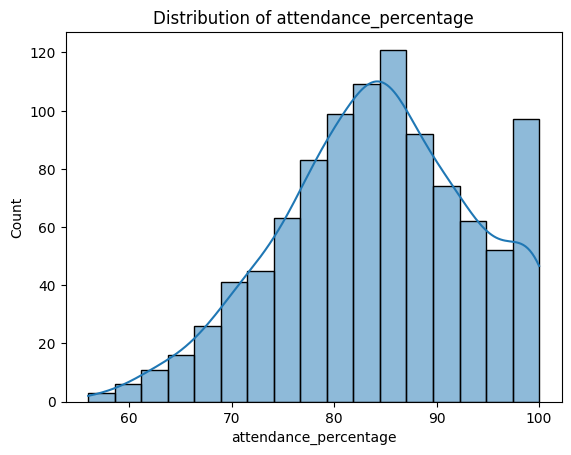

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


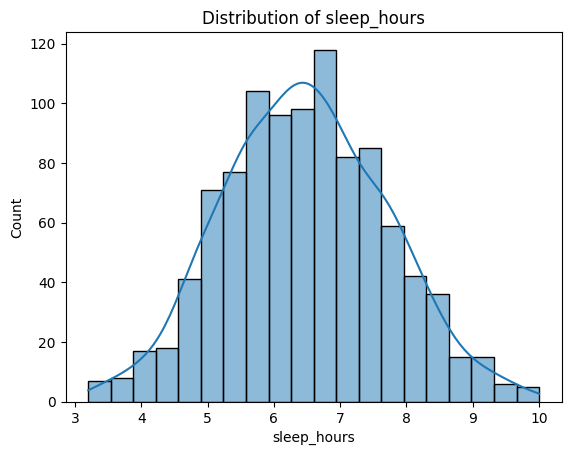

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


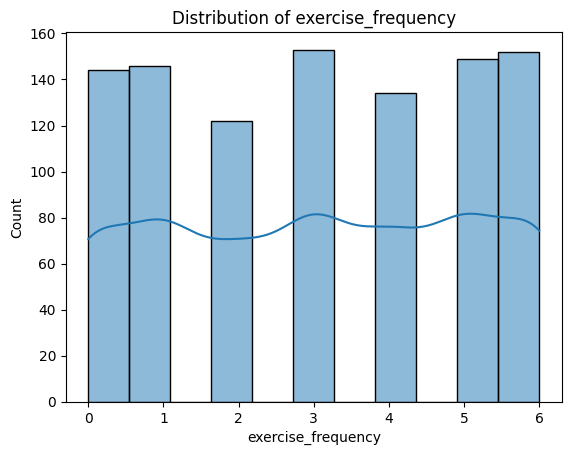

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


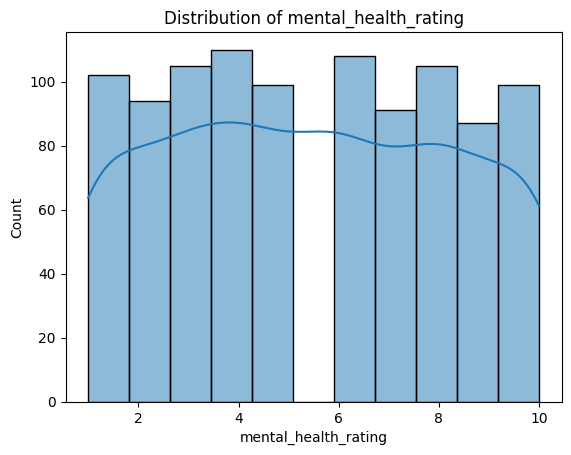

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


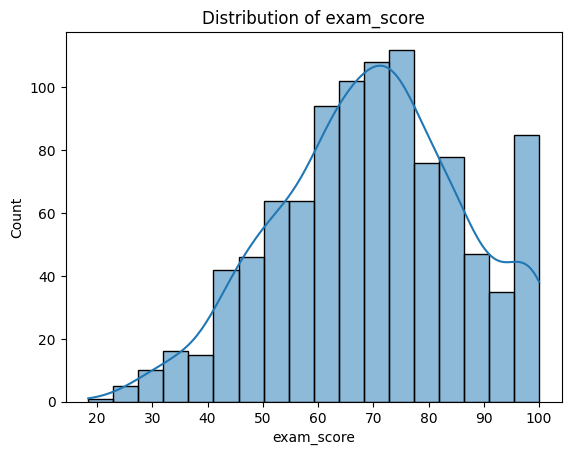

In [297]:
for col in df_numeric:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()
    

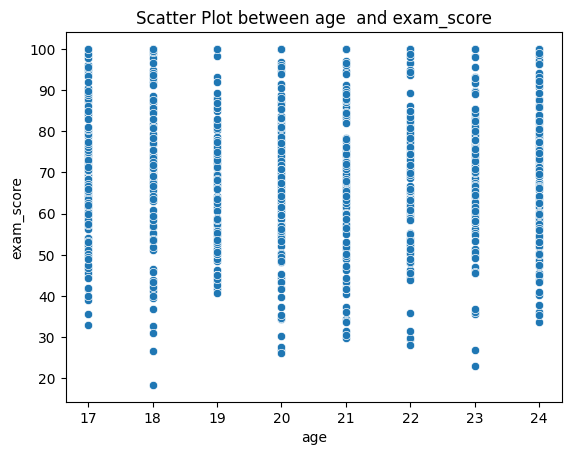

In [298]:
sns.scatterplot(x='age', y='exam_score', data=df)
plt.title('Scatter Plot between age  and exam_score')
plt.show()


In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       1000 non-null   object 
 12  internet_quality               1000 non-null   ob

## 5. Import Necessary algorithms

In [300]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [301]:
df.drop(columns=['student_id'], inplace=True)

In [302]:
X = df.iloc[:,0:14]
y = df.iloc[:,-1]

In [303]:
X

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes
996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes
997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes
998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No


In [304]:
y

0       56.2
1      100.0
2       34.3
3       26.8
4       66.4
       ...  
995     76.1
996     65.9
997     64.4
998     69.7
999     74.9
Name: exam_score, Length: 1000, dtype: float64

In [305]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1000 non-null   int64  
 1   gender                         1000 non-null   object 
 2   study_hours_per_day            1000 non-null   float64
 3   social_media_hours             1000 non-null   float64
 4   netflix_hours                  1000 non-null   float64
 5   part_time_job                  1000 non-null   object 
 6   attendance_percentage          1000 non-null   float64
 7   sleep_hours                    1000 non-null   float64
 8   diet_quality                   1000 non-null   object 
 9   exercise_frequency             1000 non-null   int64  
 10  parental_education_level       1000 non-null   object 
 11  internet_quality               1000 non-null   object 
 12  mental_health_rating           1000 non-null   in

In [309]:
df.columns = df.columns.str.strip()

## 6. Encoding and scaling the Columns (Categorical and numerical)

In [310]:
numeric_cols = ['age','attendance_percentage','sleep_hours','exercise_frequency','mental_health_rating','study_hours_per_day','social_media_hours','netflix_hours']
categoric_cols =['gender','diet_quality','internet_quality','extracurricular_participation','part_time_job']
                 
ordinal_cols = ['parental_education_level']

In [311]:
education_categories = [['High School','Bachelor','Master','Missing']]

In [312]:
print(X.columns)
print(categoric_cols)
print(ordinal_cols)
print(numeric_cols)


Index(['age', 'gender', 'study_hours_per_day', 'social_media_hours',
       'netflix_hours', 'part_time_job', 'attendance_percentage',
       'sleep_hours', 'diet_quality', 'exercise_frequency',
       'parental_education_level', 'internet_quality', 'mental_health_rating',
       'extracurricular_participation'],
      dtype='object')
['gender', 'diet_quality', 'internet_quality', 'extracurricular_participation', 'part_time_job']
['parental_education_level']
['age', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'study_hours_per_day', 'social_media_hours', 'netflix_hours']


In [313]:
one_hot = OneHotEncoder(handle_unknown='ignore')
ordinal = OrdinalEncoder(categories=education_categories)
scaling = StandardScaler()

In [314]:
preprocessor = ColumnTransformer(transformers=[
    ('onehot',one_hot,categoric_cols),
    ('ordinal',ordinal,ordinal_cols),
    ('scaling',scaling,numeric_cols),
])

In [315]:
lr = LinearRegression()


In [316]:
svr = SVR(kernel='linear')

## Using Pipeline

In [318]:
pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('linear',lr),
])

## 7. Fit the model

In [319]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'diet_quality',
                                                   'internet_quality',
                                                   'extracurricular_participation',
                                                   'part_time_job']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['High '
                                                                              'School',
                                                                              'Bachelor',
                                                                              'Master',
                                                                              'Missing']]),
                                                  ['parental_education_level']),
                                                 ('scaling', StandardScaler(),
                                                  ['age',
                                                   'attendance_percentage',
                                                   'sleep_hours',
                                                   'exercise_frequency',
                                                   'mental_health_rating',
                                                   'study_hours_per_day',
                                                   'social_media_hours',
                                                   'netflix_hours'])])),
                ('linear', LinearRegression())])

## 8. predict the y_test

In [320]:
y_pred = pipeline.predict(X_test)

In [321]:
y_pred

array([ 66.5   ,  75.5   ,  78.    ,  73.5   ,  61.125 ,  53.875 ,
        75.5625,  55.3125,  40.625 ,  71.5625,  40.4375, 103.125 ,
        57.4375,  72.1875,  36.5   ,  57.8125,  72.6875,  69.4375,
        64.5625,  50.6875,  55.5   ,  62.5625,  50.375 ,  86.8125,
        70.    ,  71.25  ,  68.6875,  57.5   ,  70.3125,  67.375 ,
        65.9375,  78.8125,  63.4375,  81.75  ,  61.1875,  50.8125,
        71.9375,  57.8125,  65.5625,  97.3125,  49.9375,  84.8125,
        67.9375,  64.4375,  94.0625,  81.8125,  53.5625,  79.75  ,
        62.875 ,  65.3125,  66.375 ,  47.1875,  71.375 ,  78.1875,
        44.1875,  75.8125,  73.6875,  68.625 ,  65.375 ,  49.4375,
        86.1875,  75.1875,  75.5625,  47.375 ,  73.9375,  50.25  ,
        69.8125,  87.5625,  56.9375,  75.0625,  58.875 ,  71.4375,
        39.3125,  58.1875,  77.9375,  69.9375,  98.0625,  74.5   ,
        83.25  ,  75.1875,  64.5625,  69.375 ,  75.1875,  53.3125,
        63.9375,  64.125 ,  77.5625,  77.8125,  65.75  ,  32.6

In [322]:
y_test

521    64.2
737    72.7
740    79.0
660    79.5
411    58.2
       ... 
408    34.3
332    71.2
208    75.8
613    85.7
78     77.3
Name: exam_score, Length: 200, dtype: float64

## 9. check accuracy

In [323]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.8985813582363524


## 10. plot the regression line

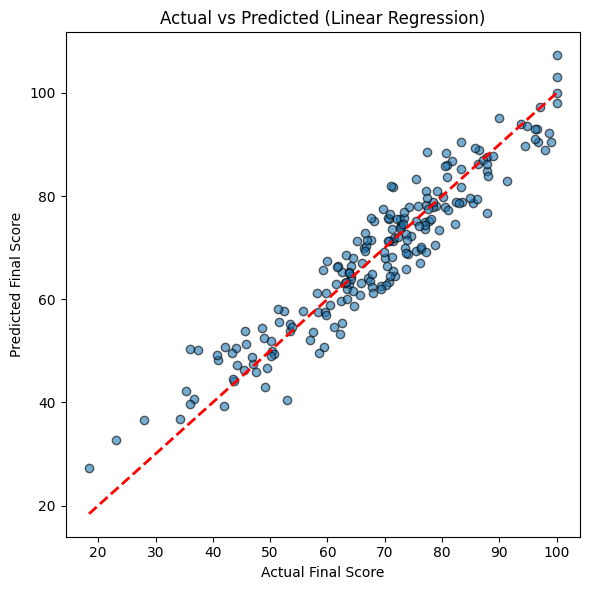

In [324]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Final Score')
plt.ylabel('Predicted Final Score')
plt.title('Actual vs Predicted (Linear Regression)')
plt.tight_layout()
plt.show()